# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
ab_data_path = 'ab_data.csv'
df = pd.read_csv(ab_data_path)

**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
num_rows = df.shape[0]
num_rows

294478

**c.** The number of unique users in the dataset.

In [4]:
num_unique_users = df['user_id'].nunique()
num_unique_users

290584

**d.** The proportion of users converted.

In [5]:
conversion_rate = df['converted'].mean()
conversion_rate

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
treatment_mismatch_count = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].shape[0]

treatment_mismatch_count

1965

**f.** Do any of the rows have missing values?

In [7]:
missing_values = df.isnull().sum()
missing_values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) |
         ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
unique_users_df2 = df2['user_id'].nunique()
unique_users_df2

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
repeated_user_id = df2[df2['user_id'].duplicated()]['user_id'].unique()
repeated_user_id

array([773192])

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
repeated_user_info = df2[df2['user_id'] == 773192]
repeated_user_info

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
df2 = df2.drop_duplicates(subset='user_id', keep='first')

# Verify that the duplicate has been removed
df2[df2['user_id'] == 773192]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [14]:
overall_conversion_rate = df2['converted'].mean()
overall_conversion_rate

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_conversion_rate = df2[df2['group'] == 'control']['converted'].mean()
control_conversion_rate

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_conversion_rate = df2[df2['group'] == 'treatment']['converted'].mean()
treatment_conversion_rate

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_conversion_rate - control_conversion_rate
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
new_page_probability = (df2['landing_page'] == 'new_page').mean()
new_page_probability

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>The conversion rate for the control group is slightly higher (12.04%) compared to the treatment group (11.88%). The difference is very small, and given that the overall conversion rate is close to both individual group rates, there doesn't appear to be strong evidence suggesting that the new page leads to more conversions. Based on this basic comparison, there isn't sufficient evidence to conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

Given that we want to assume the old page is better unless the new page proves to be better, and we're working with a Type I error rate of 5% (α = 0.05), the hypotheses would be:

Null Hypothesis (H₀): The conversion rate for the new page is less than or equal to the conversion rate for the old page.
- 𝐻0: 𝑝𝑛𝑒𝑤 is less than or equal to 𝑝𝑜𝑙𝑑

This implies that the new page is not better than the old page in terms of conversion rate.

Alternative Hypothesis (H₁): The conversion rate for the new page is greater than the conversion rate for the old page.
- 𝐻1: 𝑝𝑛𝑒𝑤 is greater than 𝑝𝑜𝑙𝑑

This alternative suggests that the new page has a higher conversion rate than the old page.

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_population = df2['converted'].mean()
p_population

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_population = df2['converted'].mean()
p_population

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
n_new = df2[df2['group'] == 'treatment'].shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2[df2['group'] == 'control'].shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [23]:
# Simulate n_new transactions with a conversion rate of p_new under the null hypothesis
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1 - p_population, p_population])

# Display the first few entries of the simulated array
new_page_converted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate n_old transactions with a conversion rate of p_old under the null hypothesis
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1 - p_population, p_population])

# Display the first few entries of the simulated array
old_page_converted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
# Calculate the converted probabilities for the new and old pages from the simulated samples
p_new_simulated = new_page_converted.mean()
p_old_simulated = old_page_converted.mean()

# Find the difference in converted probabilities between new and old pages
simulated_diff = p_new_simulated - p_old_simulated
simulated_diff

-0.0003532102807014964


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = []

# Perform the simulation 10,000 times
for _ in range(10000):
    # Simulate new_page_converted and old_page_converted arrays
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1 - p_population, p_population])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1 - p_population, p_population])
    
    # Calculate the converted probabilities for new and old pages
    p_new_simulated = new_page_converted.mean()
    p_old_simulated = old_page_converted.mean()
    
    # Append the difference to p_diffs
    p_diffs.append(p_new_simulated - p_old_simulated)

# Convert the list to a NumPy array
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

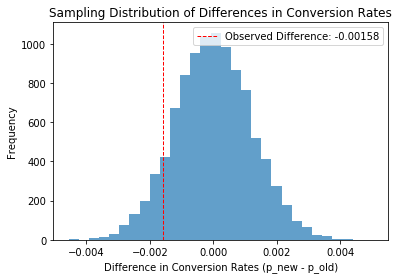

In [27]:
# Recalculate treatment and control conversion rates
treatment_conversion_rate = df2[df2['group'] == 'treatment']['converted'].mean()
control_conversion_rate = df2[df2['group'] == 'control']['converted'].mean()

# Now replot the histogram
plt.hist(p_diffs, bins=30, alpha=0.7)
plt.title('Sampling Distribution of Differences in Conversion Rates')
plt.xlabel('Difference in Conversion Rates (p_new - p_old)')
plt.ylabel('Frequency')

# Mark the actual observed difference (obs_diff) with a vertical line
obs_diff = treatment_conversion_rate - control_conversion_rate
plt.axvline(obs_diff, color='red', linestyle='dashed', linewidth=1, label=f'Observed Difference: {obs_diff:.5f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
# Calculate the proportion of p_diffs that are greater than the observed difference
proportion_greater = (p_diffs > obs_diff).mean()
proportion_greater

0.90690000000000004

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

> In part j, we computed the p-value, which is a common term in scientific studies. The p-value represents the proportion of the simulated differences in conversion rates (under the null hypothesis) that are greater than the observed difference from the actual data.

> Interpretation:
A p-value of 0.906 means that 90.6% of the simulated differences are greater than the observed difference, suggesting that the observed difference is not unusual under the null hypothesis.This value is much higher than the commonly used Type I error rate of 0.05. The Type I error rate (α) is the threshold for rejecting the null hypothesis. If the p-value is less than α, it would reject the null hypothesis and conclude that there is a statistically significant difference.

> Conclusion:
Since the p-value (0.906) is significantly larger than 0.05, it fails to reject the null hypothesis. This implies there is no strong evidence to conclude that the new page leads to more conversions than the old page. The difference observed in the conversion rates is likely due to random chance.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = 17,489

# number of conversions with the new_page
convert_new = 17,264

# number of individuals who were shown the old_page
n_old = 145,274

# number of individuals who received new_page
n_new = 145,310

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [30]:
import statsmodels.api as sm

# Calculate number of conversions and observations for both groups
convert_old = df2[(df2['group'] == 'control') & (df2['converted'] == 1)].shape[0]
convert_new = df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)].shape[0]
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

# Perform the z-test using sm.stats.proportions_ztest
count_array = [convert_new, convert_old]  # number of conversions for new_page and old_page
nobs_array = [n_new, n_old]  # total number of observations for new_page and old_page

# Right-tailed test ('larger')
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

>z-score (-1.31): This negative value means that the conversion rate for the new page is lower than the conversion rate for the old page, contrary to what we hypothesized (that the new page would be better).
p-value (0.905): This high p-value indicates that the difference observed between the conversion rates of the new and old pages is not statistically significant. In fact, a p-value this large suggests that there is a very high likelihood that the observed difference is due to random chance. It means we fail to reject the null hypothesis.

> Yes, the results are consistent with what we found in parts j and k:
In part j, finding that about 90.4% of the simulated differences were greater than the actual observed difference, which implies that the observed difference is not statistically significant. In part k, the conclusion reached that the p-value being much greater than the Type I error rate (0.05) means there isn't sufficient evidence to claim that the new page performs better.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>Since each row in the df2 data represents a binary outcome (either a conversion or no conversion), the appropriate type of regression to perform is logistic regression.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [31]:
# Add the intercept column with all values set to 1
df2['intercept'] = 1

# Create the ab_page column: 1 for treatment group (new page), 0 for control group (old page)
df2['ab_page'] = (df2['group'] == 'treatment').astype(int)

# Display the first few rows to verify
df2[['intercept', 'ab_page']].head()

,intercept,ab_page
0,1,0
1,1,0
2,1,1
3,1,1
4,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [32]:
import statsmodels.api as sm
import scipy.stats as stats

# Define the independent variables (intercept and ab_page) and the dependent variable (converted)
X = df2[['intercept', 'ab_page']]
y = df2['converted']

# Instantiate and fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Manually calculate the LLR p-value using the chi-square distribution
llr_pvalue = stats.chi2.sf(result.llr, result.df_model)

# Manually extract the key metrics
coef = result.params  # Coefficients
pvalues = result.pvalues  # P-values
conf = result.conf_int()  # Confidence intervals

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
# Print the regression output manually
print("Logit Regression Results")
print("===================================")
print(f"Intercept Coefficient: {coef['intercept']:.4f}")
print(f"ab_page Coefficient: {coef['ab_page']:.4f}")
print("-----")
print(f"Intercept P-value: {pvalues['intercept']:.4g}")
print(f"ab_page P-value: {pvalues['ab_page']:.4g}")
print("-----")
print(f"Intercept 95% CI: [{conf[0][0]:.4f}, {conf[1][0]:.4f}]")
print(f"ab_page 95% CI: [{conf[0][1]:.4f}, {conf[1][1]:.4f}]")
print("-----")
print(f"Manually Computed LLR p-value: {llr_pvalue:.4g}")

Logit Regression Results
Intercept Coefficient: -1.9888
ab_page Coefficient: -0.0150
-----
Intercept P-value: 0
ab_page P-value: 0.1899
-----
Intercept 95% CI: [-2.0046, -1.9730]
ab_page 95% CI: [-0.0374, 0.0074]
-----
Manually Computed LLR p-value: 0.1899


**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>From the logistic regression model, the p-value for ab_page is approximately 0.190. The p-value differs from Part II due to differences in the null and alternative hypotheses between the A/B test and the regression model.

> The null and alternative hypothesis from part 2 are a one-sided test since we are only interested in whether the new page performs better than the old page. They were as follows: Null Hypothesis (H₀): The conversion rate of the new page is less than or equal to the conversion rate of the old page. (𝑝𝑛𝑒𝑤≤𝑝𝑜𝑙𝑑) and Alternative Hypothesis (H₁): The conversion rate of the new page is higher than the conversion rate of the old page.(𝑝𝑛𝑒𝑤>𝑝𝑜𝑙𝑑)

> The null and alternative hypothesis from part 3 are a two-sided test because we are testing if the ab_page coefficient is different from zero in either direction (higher or lower conversion rates). They were as follows: Null Hypothesis (H₀): There is no significant relationship between the type of page (old or new) and the conversion rate. The coefficient of ab_page is zero. Alternative Hypothesis (H₁): There is a significant relationship between the type of page and the conversion rate. The coefficient of ab_page is not zero.

>The p-value of 0.190 is greater than 0.05, indicating that it fails to reject the null hypothesis. This suggests that there is no statistically significant difference between the conversion rates for the new page and the old page.

>The p-value in Part III (0.190) is different from Part II because the regression model tests for differences in both directions (two-sided), while the A/B test in Part II was focused on one direction (one-sided). In both cases, the evidence suggests that there is no significant difference in conversion rates between the old and new pages.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> While adding more factors can improve the model's accuracy and control for confounding variables, it’s important to balance this with the risk of overfitting and multicollinearity. A good practice is to include factors that are theoretically or practically relevant to conversions, and then check the model diagnostics to ensure it’s performing well.

> Advantages of having other factors to add to a regression model: 
- Improved Predictive Power: By adding relevant variables, you can increase the model's ability to explain the variance in the dependent variable (conversion). For example, user demographics (like age, gender, or region) or browsing behavior could provide more insights into why someone converts.
- Multivariable Analysis: Adding more factors allows you to perform a multivariable analysis, which means you can simultaneously examine the effects of multiple factors on conversion. This makes the analysis more robust and comprehensive.
- Interaction Effects: Additional factors can help reveal interaction effects. For example, the effect of the new page on conversion might depend on certain user characteristics (e.g., age or device type). This interaction can be captured with additional terms in the model.

> Potential disadvantages: 
- Overfitting - If too many variables are included, the model might become overly complex and fit the noise in the training data rather than the underlying pattern. Overfitting makes the model less generalizable to new, unseen data. 
- Multicollinearity - If the added variables are highly correlated with each other, this can cause multicollinearity, which makes it difficult to interpret the coefficients accurately. Multicollinearity can inflate the standard errors of the estimates and make it harder to determine which variables are significant.


**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [34]:
import pandas as pd

countries_path = 'countries.csv'
countries_df = pd.read_csv(countries_path)

In [35]:
# Merge the countries dataset with df2 on the 'user_id' column
df_merged = pd.merge(df2, countries_df, on='user_id')

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [36]:
# Create dummy variables for the three countries (CA, UK, US)
country_dummies = pd.get_dummies(df_merged['country'], drop_first=True)

# Merge the dummy variables back into df_merged
df_merged = pd.concat([df_merged, country_dummies], axis=1)

# Define the independent variables (intercept, ab_page, and country dummies without CA)
X = df_merged[['intercept', 'ab_page', 'UK', 'US']]
y = df_merged['converted']

# Instantiate and fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Manually extract the key metrics
coef = result.params  # Coefficients
pvalues = result.pvalues  # P-values
conf = result.conf_int()  # Confidence intervals

In [37]:
# Display the key metrics
print("Logit Regression Results")
print("===================================")
print(f"Intercept Coefficient: {coef['intercept']:.4f}")
print(f"ab_page Coefficient: {coef['ab_page']:.4f}")
print(f"UK Coefficient: {coef['UK']:.4f}")
print(f"US Coefficient: {coef['US']:.4f}")
print("-----")
print(f"ab_page P-value: {pvalues['ab_page']:.4g}")
print(f"UK P-value: {pvalues['UK']:.4g}")
print(f"US P-value: {pvalues['US']:.4g}")
print("-----")
print(f"ab_page 95% CI: [{conf[0]['ab_page']:.4f}, {conf[1]['ab_page']:.4f}]")
print(f"UK 95% CI: [{conf[0]['UK']:.4f}, {conf[1]['UK']:.4f}]")
print(f"US 95% CI: [{conf[0]['US']:.4f}, {conf[1]['US']:.4f}]")

Logit Regression Results
Intercept Coefficient: -2.0300
ab_page Coefficient: -0.0149
UK Coefficient: 0.0506
US Coefficient: 0.0408
-----
ab_page P-value: 0.1912
UK P-value: 0.0745
US P-value: 0.1295
-----
ab_page 95% CI: [-0.0374, 0.0075]
UK 95% CI: [-0.0050, 0.1063]
US 95% CI: [-0.0119, 0.0934]


> It does not appear that country has an impact on conversion based on the data collected. The results show that neither the United States nor the United Kingdom has a statistically significant effect on conversion rates compared to the baseline group, which is Canada. The p-value for the UK is 0.0745, which is close to the threshold, suggesting that UK users might have a slightly higher conversion rate, but this result is not conclusive. The p-value for the US is 0.1295, indicating no significant difference in conversion behavior between US and Canadian users. Overall, we cannot conclude that country or page type has a meaningful impact on conversion rates based on this analysis.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [38]:
# Create interaction terms between ab_page and the country dummies (UK, US)
df_merged['ab_page_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_page_US'] = df_merged['ab_page'] * df_merged['US']

# Define the independent variables (including interaction terms) and the dependent variable
X_interaction = df_merged[['intercept', 'ab_page', 'UK', 'US', 'ab_page_UK', 'ab_page_US']]
y_interaction = df_merged['converted']

# Instantiate and fit the logistic regression model with interaction terms
logit_model_interaction = sm.Logit(y_interaction, X_interaction)
result_interaction = logit_model_interaction.fit()

# Manually extract the key metrics for interaction model
coef_interaction = result_interaction.params  # Coefficients
pvalues_interaction = result_interaction.pvalues  # P-values
conf_interaction = result_interaction.conf_int()  # Confidence intervals

# Display the key metrics for interaction model
print("Logit Regression Results with Interaction Terms")
print("==============================================")
print(f"Intercept Coefficient: {coef_interaction['intercept']:.4f}")
print(f"ab_page Coefficient: {coef_interaction['ab_page']:.4f}")
print(f"UK Coefficient: {coef_interaction['UK']:.4f}")
print(f"US Coefficient: {coef_interaction['US']:.4f}")
print(f"ab_page_UK Coefficient: {coef_interaction['ab_page_UK']:.4f}")
print(f"ab_page_US Coefficient: {coef_interaction['ab_page_US']:.4f}")
print("-----")
print(f"ab_page P-value: {pvalues_interaction['ab_page']:.4g}")
print(f"UK P-value: {pvalues_interaction['UK']:.4g}")
print(f"US P-value: {pvalues_interaction['US']:.4g}")
print(f"ab_page_UK P-value: {pvalues_interaction['ab_page_UK']:.4g}")
print(f"ab_page_US P-value: {pvalues_interaction['ab_page_US']:.4g}")
print("-----")
print(f"ab_page 95% CI: [{conf_interaction[0]['ab_page']:.4f}, {conf_interaction[1]['ab_page']:.4f}]")
print(f"UK 95% CI: [{conf_interaction[0]['UK']:.4f}, {conf_interaction[1]['UK']:.4f}]")
print(f"US 95% CI: [{conf_interaction[0]['US']:.4f}, {conf_interaction[1]['US']:.4f}]")
print(f"ab_page_UK 95% CI: [{conf_interaction[0]['ab_page_UK']:.4f}, {conf_interaction[1]['ab_page_UK']:.4f}]")
print(f"ab_page_US 95% CI: [{conf_interaction[0]['ab_page_US']:.4f}, {conf_interaction[1]['ab_page_US']:.4f}]")

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
Logit Regression Results with Interaction Terms
Intercept Coefficient: -2.0040
ab_page Coefficient: -0.0674
UK Coefficient: 0.0118
US Coefficient: 0.0175
ab_page_UK Coefficient: 0.0783
ab_page_US Coefficient: 0.0469
-----
ab_page P-value: 0.1947
UK P-value: 0.7674
US P-value: 0.6418
ab_page_UK P-value: 0.1681
ab_page_US P-value: 0.3833
-----
ab_page 95% CI: [-0.1694, 0.0345]
UK 95% CI: [-0.0663, 0.0899]
US 95% CI: [-0.0563, 0.0914]
ab_page_UK 95% CI: [-0.0330, 0.1896]
ab_page_US 95% CI: [-0.0585, 0.1523]


> Statistical Conclusion:
The results of the logistic regression model, which included interaction terms between page type and country, indicate that none of the variables have a statistically significant impact on conversion rates. The p-values for all variables, including the page type (ab_page), country (UK and US), and the interaction effects (ab_page_UK and ab_page_US), are all greater than the standard significance level of 0.05. As a result, we fail to reject the null hypothesis for each term. This means that neither the new page nor the country of the user (UK or US compared to Canada) has a statistically significant effect on conversion rates. Furthermore, the interaction between page type and country does not show any significant effects, suggesting that the conversion rates for the new page are not impacted by the user’s location.

> Practical Conclusion:
From a practical business perspective, the results suggest that implementing the new page would not lead to significant improvements in conversion rates, regardless of whether the user is from Canada, the UK, or the US. The interaction terms also indicate that there is no meaningful difference in how the new page performs across these different countries. Therefore, introducing the new page is unlikely to provide a conversion benefit, and the decision to change the page design should not be influenced by geographic considerations. Based on this analysis, keeping the current page may be the better option, as there is no evidence to suggest that the new page would outperform it in driving conversions.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0